In [1]:
import pickle, os, torch
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

In [2]:
# this is the correlated run
folder = 'results_final_Z_270322'
run= 'Sage_vlarge_all_allt_z0.0_quantile_raw_rm_msdgfh_1_2'

folder = 'results_final_Z_300322'
run= 'Sage_vlarge_all_allt_z0.0_quantile_raw_rm_mllteo'

pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/{folder}/{run}')    
results=pickle.load(open(osp.join(pointer,'result_dict.pkl'), 'rb'))
config=pickle.load(open(osp.join(pointer,'construct_dict.pkl'), 'rb'))
ys, pred = results['low_ys'], results['low_pred']
mstar_ys, mstar_pred = ys[:,0]+9, pred[:,0]+9
# mcold_ys, mcold_pred = ys[:,2]+9, pred[:,2]+9

Zy, Zpred = ys[:,2]+9, pred[:,2]+9
Coldy, Coldpred = ys[:,1]+9, pred[:,1]+9
sfr_ys, sfr_pred = ys[:,3], pred[:,3]
sfr100_ys, sfr100_pred = ys[:,4], pred[:,4]
Mbh_ys, Mbh_pred = ys[:,5]+9, pred[:,5]+9

Zy-=Coldy
Zpred-=Coldpred

ys = np.vstack([ mstar_ys, Coldy, Zy, sfr_ys, sfr100_ys, Mbh_ys]).T
pred = np.vstack([mstar_pred, Coldpred, Zpred, sfr_pred, sfr100_pred, Mbh_pred]).T

cols_t = [r'$M_*$', r'$M_{cold}$', r'$Z_{gas}$', r'$SFR$', r'$SFR_{100}$', r'$M_{BH}$']

In [3]:
ys, pred = results['low_ys'], results['low_pred']

mstar_ys, mstar_pred = ys[:,0], pred[:,0]
Zy, Zpred = ys[:,2], pred[:,2]
Coldy, Coldpred = ys[:,1], pred[:,1]
sfr_ys, sfr_pred = ys[:,3], pred[:,3]
sfr100_ys, sfr100_pred = ys[:,4], pred[:,4]
Mbh_ys, Mbh_pred = ys[:,5], pred[:,5]
Zy-=Coldy
Zpred-=Coldpred

ys = np.vstack([ mstar_ys, Coldy, Zy, sfr_ys, sfr100_ys, Mbh_ys]).T
pred = np.vstack([mstar_pred, Coldpred, Zpred, sfr_pred, sfr100_pred, Mbh_pred]).T

In [4]:
datat=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_all_t_z0.0_None/data.pkl'), 'rb'))

In [5]:
len(datat[0].x[0,:])

37

In [6]:
from torch_geometric.data import Data
data=[]
for d in datat:
    if np.all(d.y.numpy()[np.arange(5,28)]>0):
        data.append(Data(x=d.x, edge_index=d.edge_index, edge_attr=d.edge_attr, y=d.y[[8,15,20,21,23,27]]))
    else:
#         print(d.y.numpy()[np.arange(5,27)]>0)
        continue

In [7]:
testidx = pickle.load(open(osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphStorage/tvt_idx/test_idx_rm.pkl'), 'rb'))

In [8]:
trainidx = np.arange(len(data))
trainidx = np.delete(trainidx, testidx)

In [9]:
Xte = []
Xtr = []
ytr = []
yte = []
test_data = []
for i, d in tqdm(enumerate(data), total=len(data)):
    if i in testidx:
        Xte.append(d.x.numpy()[0,:])
        yte.append(d.y.numpy())
        test_data.append(d.x.numpy())
    else:
        Xtr.append(d.x.numpy()[0,:])
        ytr.append(d.y.numpy())

100%|██████████████████████████████████████████████████████| 108338/108338 [03:42<00:00, 486.86it/s]


In [10]:
Xte = np.array(Xte)
Xtr = np.array(Xtr)
ytr = np.array(np.log10(ytr))
yte = np.array(np.log10(yte))

In [11]:
Mhf=[]
M200= []
M500 = []
M2500 = []
r_vir = []
rs_klypin = []
for d in test_data:
    Mhf.append(d[0,3])
    
    r_vir.append(d[0,4])
    rs_klypin.append(d[0,20])
    
    M200.append(d[0,23])
    M500.append(d[0,24])
    M2500.append(d[0,25])  
    

In [12]:
Mhf=[]
M200= []
M500 = []
M2500 = []
r_vir = []
rs_klypin = []
for d in test_data:
    Mhf.append(d[0,3])
    
    r_vir.append(d[0,4])
    rs_klypin.append(d[0,14])
    
    M200.append(d[0,23])
    M500.append(d[0,24])
    M2500.append(d[0,25])
Mhf = np.array(Mhf)

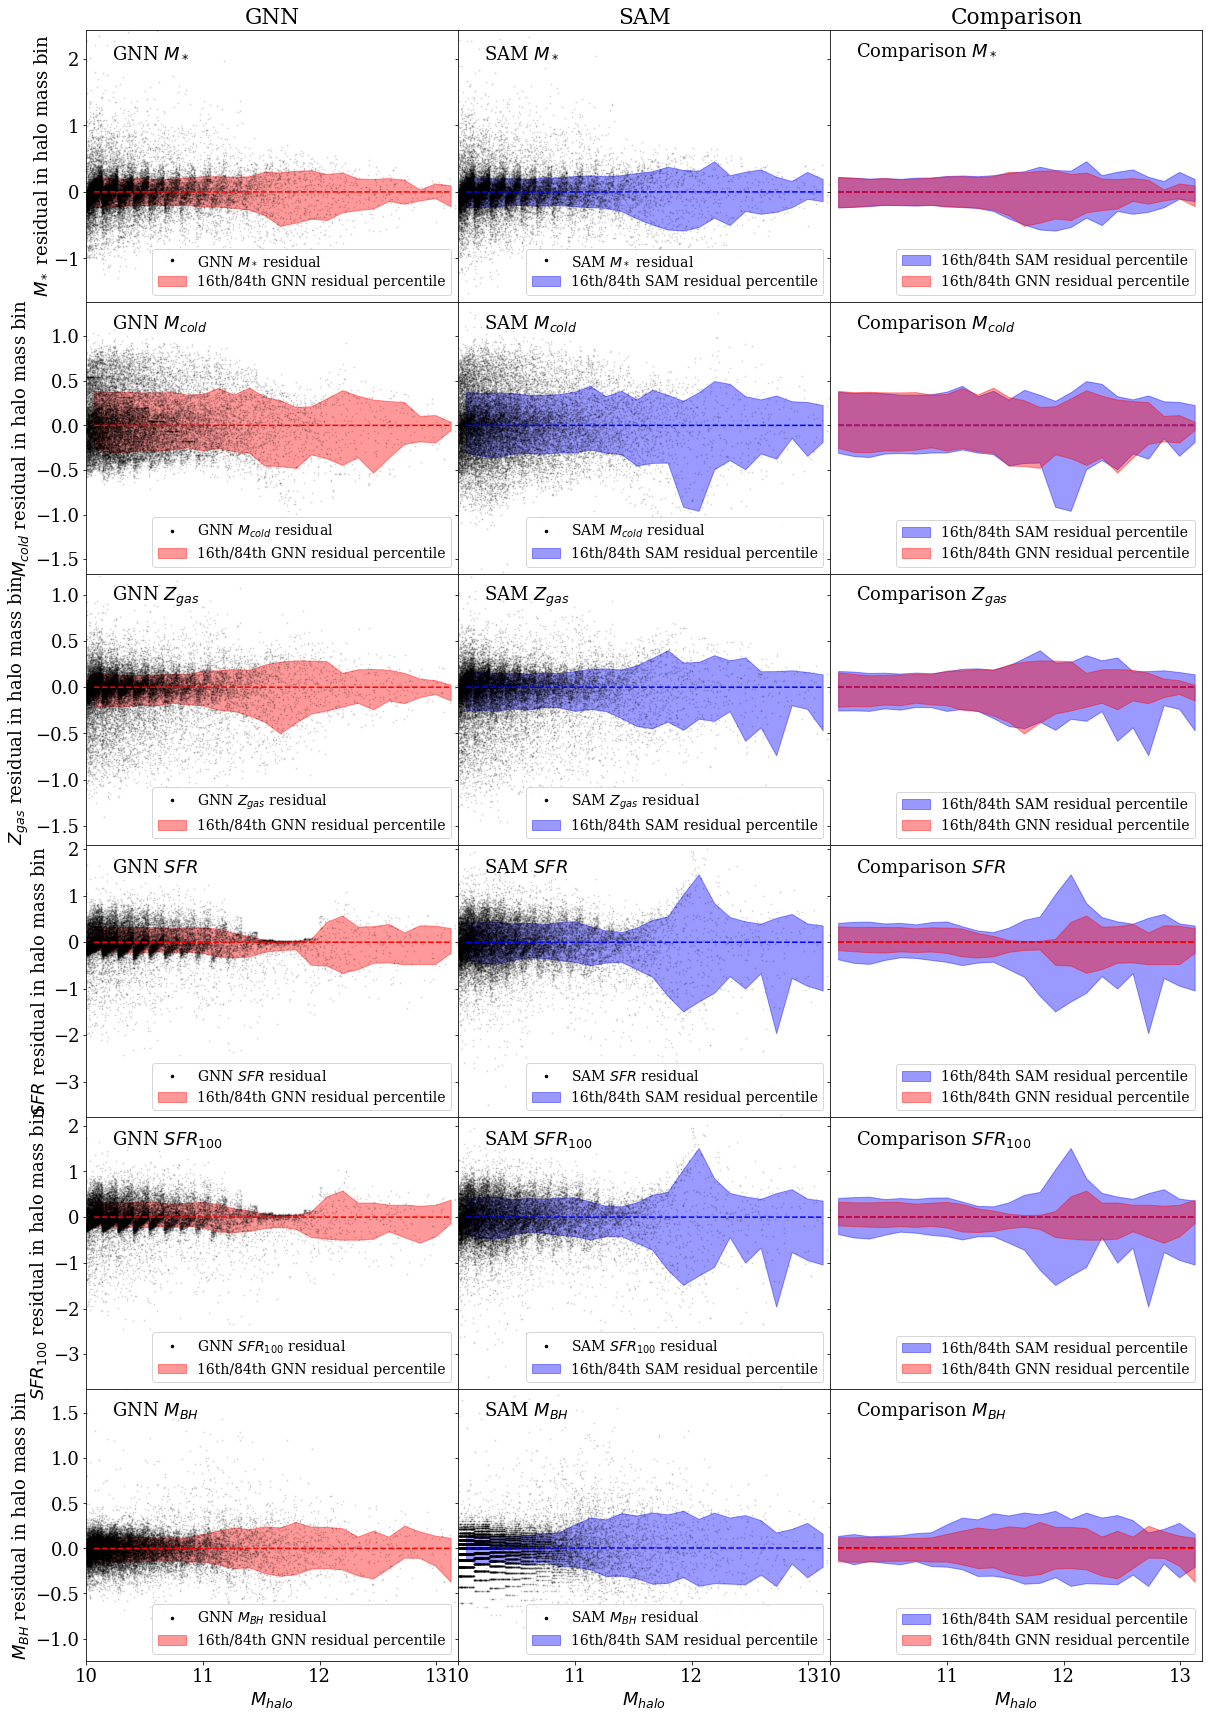

In [30]:
fig, axs = plt.subplots(ncols=3,nrows=6, figsize=(20,30), sharey=False, sharex=True, gridspec_kw={'wspace': 0.0, 'hspace': 0.0})

l=0.025
nbins = 25
edges=np.linspace(min(Mhf), max(Mhf),nbins)
centers=(edges[:-1]+edges[1:])/2

font = {'family' : 'Serif',
        'weight' : 'normal',
        'size'   : 18}

mpl.rc('font', **font)

locs = ['upper right', 'lower left', 'lower left', 'lower left', 'lower left', 'upper right' ]

for k in range(6):
    ax = axs[k] 
    ax=ax.flatten()
    res_y = []
    res_pred = []
    Mhbin = []
    for i in range(len(edges)-1):
        mask=np.logical_and(edges[i]<=Mhf,edges[i+1]>=Mhf)
        res_y.append(ys[:,k][mask]-np.median(ys[:,k][mask]))
        res_pred.append(pred[:,k][mask]-np.median(pred[:,k][mask]))
        Mhbin.append(Mhf[mask])

    res_y = np.hstack(res_y).flatten()
    res_pred = np.hstack(res_pred).flatten()
    Mhbin = np.hstack(Mhbin)

    edges=np.linspace(min(Mhbin), max(Mhbin), nbins)
    centers=(edges[:-1]+edges[1:])/2
    deltay = []
    deltapred = []
    dy1684 = []
    dpred1684 = []

    aplot, afill = 0.1, 0.4

    titles = ['GNN', 'SAM', 'Comparison']

    n = []
    for i in range(len(edges)-1):
        mask=np.logical_and(edges[i]<Mhbin,edges[i+1]>=Mhbin)
        deltay.append(np.median(res_y[mask]))
        dy1684.append(np.percentile(res_y[mask], [16,84]))
        n.append(sum(mask))
        deltapred.append(np.median(res_pred[mask]))
        dpred1684.append(np.percentile(res_pred[mask], [16,84]))

    
    dpred1684 = np.vstack(dpred1684)
    dy1684 = np.vstack(dy1684)

#     fig, ax =plt.subplots(ncols=3,nrows=1, figsize=(20,6), sharey=True, gridspec_kw={'wspace': 0.0, 'hspace': 0.0})
#     ax=ax.flatten()
    ax[1].plot(Mhbin, res_y, 'ko', markersize=1, alpha=aplot)
    ax[1].plot(Mhbin[0]-10, res_y[0]-10, 'ko', markersize=2.5, alpha=1, label = f'SAM {cols_t[k]} residual')
    
    # ax[0].vlines(edges, min(deltay)-0.03, min(deltay)-0.01, color='gray', linestyle='--', label='bins used')
    ax[1].plot(centers, deltay, 'b--')
    ax[0].plot(Mhbin, res_pred, 'ko', markersize=1, alpha=aplot)
    ax[0].plot(Mhbin[0]-10, res_pred[0]-10, 'ko', markersize=2.5, alpha=1, label = f'GNN {cols_t[k]} residual')
    
    # ax[1].vlines(edges, min(deltay)-0.03, min(deltay)-0.01, color='gray', linestyle='--', label='bins used')
    ax[0].plot(centers, deltapred, 'r--')

    ax[1].fill_between(centers, dy1684[:,0], dy1684[:,1], color='b', alpha=afill, label='16th/84th SAM residual percentile')
    ax[0].fill_between(centers, dpred1684[:,0], dpred1684[:,1], color='r', alpha=afill, label='16th/84th GNN residual percentile')


    ax[2].plot(centers, deltay, 'b--')
    ax[2].plot(centers, deltapred, 'r--')
    ax[2].fill_between(centers, dy1684[:,0], dy1684[:,1], color='b', alpha=afill, label='16th/84th SAM residual percentile')
    ax[2].fill_between(centers, dpred1684[:,0], dpred1684[:,1], color='r', alpha=afill, label='16th/84th GNN residual percentile')
    downs = [0.2, -0.1, 0.05, -0.1, -0.1, 0.2]
    ups = [0, -0.2, 0, -0.1, -0.2, 0.1]
    for i, a in enumerate(ax):
        a.annotate(f'{titles[i]} {cols_t[k]}', xy = (0.07,0.9), xycoords = 'axes fraction')
        s = np.hstack([res_y, res_pred])
        s = np.percentile(s, [l, 100-l])
        s-=np.array([downs[k],ups[k]])
#         print(np.percentile(s, [l, 100-l]))
        a.set(xlim = (min(Mhbin), max(Mhbin)))
        
        if k==0:
            a.set(title = titles[i])
        if i==0:
            a.set( ylabel=f'{cols_t[k]} residual in halo mass bin'
                  , ylim = s*1.1)
        else:
            a.set(ylim = s*1.1)
            a.set(yticklabels = [])
        if k==5:
            a.set(xlabel=r'$M_{halo}$')
       
        a.legend(fontsize=14, loc = 'lower right')

In [31]:
fig.savefig('../paper_figures/mhalo_bin_residuals_alltargets.png')

In [34]:
deltapred, n

([0.0001796484,
  0.0,
  -5.9604645e-08,
  0.0,
  0.0,
  -5.9604645e-08,
  -2.9802322e-08,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [6321,
  4395,
  3198,
  2227,
  1593,
  1122,
  880,
  577,
  409,
  313,
  191,
  150,
  93,
  59,
  45,
  42,
  25,
  16,
  16])

In [38]:
np.mean(res_pred[mask])

0.015980221

In [32]:
res_pred

array([ 0.4865774 ,  0.23868144, -0.01962841, ..., -0.27871966,
       -0.00545454,  0.26635492], dtype=float32)